In [1]:
import tc_functions as fun
import credentials

ds = fun.gfs_access(2020, 11, 3, 0, credentials.RDA_USER, credentials.RDA_PASSWORD)
dataset = fun.shear_stamp(14.3, 277.5 - 360, 800, ds)

In [2]:
fun.vorticity_centroid(14.3, 277.5 - 360, 850, 300, 750, ds)

[14.748971, 277.77307]

In [3]:
dataset

<xarray.DataArray '200-850hPa_wind_shear' (component: 3, lat: 58, lon: 60)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * component  (component) <U9 'magnitude' 'u' 'v'
  * lat        (lat) >f4 21.5 21.25 21.0 20.75 20.5 ... 8.25 8.0 7.75 7.5 7.25
  * lon        (lon) >f4 270.0 270.2 270.5 270.8 ... 284.0 284.2 284.5 284.8
    sector     (lat, lon) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    long_name:         200_850 hPa vertical wind shear
    units:             meters/second
    center_lat:        14.3
    center_lon:        277.5
    stamp_radius:      800
    sector_direction:  (0, 0)
    u_avg:             -4.7173114
    v_avg:             3.1217399
    magnitude_avg:     5.656702790335171

In [18]:
dataset = fun.sectorize(dataset, 4, 1, 8)

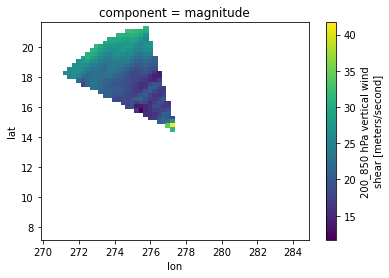

In [21]:
import numpy as np
dataset.where(np.isin(dataset.sector, [3]))[0].plot()

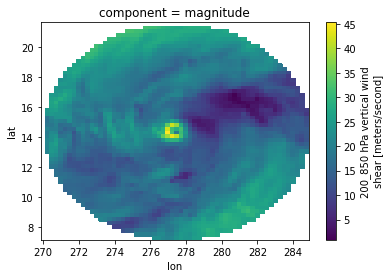

In [6]:
dataset[0].plot()

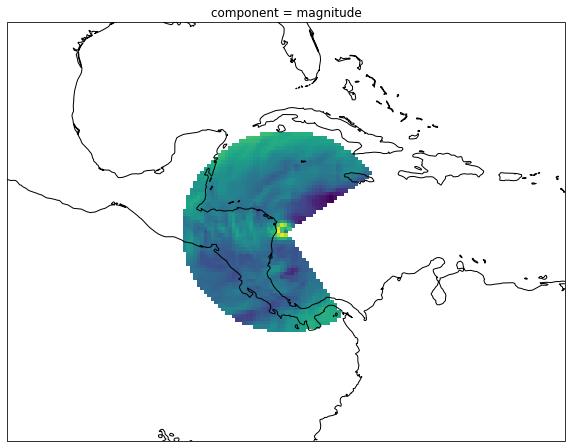

In [7]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import numpy as np

center_lat = dataset.attrs["center_lat"]
center_lon = dataset.attrs["center_lon"]
extent = [center_lon - 20, center_lon + 20, center_lat - 15, center_lat + 15]

plt.figure(figsize = (10, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
dataset.where(np.isin(dataset.sector, [1, 2, 4]))[0].plot.pcolormesh(ax = ax, transform = ccrs.PlateCarree(), x = 'lon', y = 'lat', add_colorbar = False)
ax.coastlines()
plt.show()

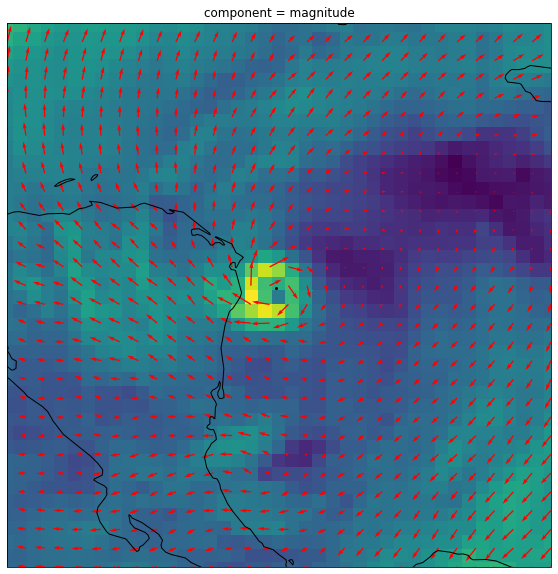

In [8]:
# Fix this plotting mess, then go back to the tc_functions and go back to circular and see if it works there. 

import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import numpy as np

center_lat = dataset.attrs["center_lat"]
center_lon = dataset.attrs["center_lon"]
extent = [center_lon - 5, center_lon + 5, center_lat - 5, center_lat + 5]

lat = dataset.coords['lat'].values
lon = dataset.coords['lon'].values

lon = np.where(lon > 180, lon - 360, lon)

u = dataset[1].values
v = dataset[2].values

plt.figure(figsize = (10, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines('50m')
dataset[0].plot.pcolormesh(ax = ax, transform = ccrs.PlateCarree(), x = 'lon', y = 'lat', add_colorbar = False)
ax.quiver(lon, lat, u, v, color = "red", transform = ccrs.PlateCarree(), regrid_shape = 30)
ax.plot(277.4362, 14.426229, markersize = 2, marker = 'o', color =  "black", transform = ccrs.PlateCarree())
plt.show()

In [3]:
rp = fun.radial_profile(dataset, 20, 50)

In [4]:
rp

<xarray.DataArray 'radial_profile' (component: 2, sector: 4, radius: 40)>
array([[[ -0.39960787,  -5.66740322,  -8.92338943, -10.99876308,
         -13.43695164, -13.55910492, -12.87185097, -11.54834747,
         -10.10792637,  -9.67919159,  -9.7234993 , -10.37487984,
         -11.25320911, -11.74485683, -12.36297512, -12.9279623 ,
         -13.45261383, -13.56390953, -13.01940632, -12.40672588,
         -11.85381699, -11.48898506, -11.0206089 , -10.46603394,
         -10.0731535 ,  -9.57673264,  -9.14522934,  -8.78616142,
          -8.43511772,  -8.18693447,  -7.77334881,  -7.52119827,
          -7.39966154,  -7.1613493 ,  -7.02182245,  -6.94719934,
          -7.10160017,  -7.25689554,  -7.28056383,  -7.30161953],
        [-26.38092041, -31.26272392, -31.4250412 , -27.02900314,
         -21.25563622, -16.87984276, -13.73728943, -12.07955647,
         -11.61287498, -11.91397095, -12.61734581, -13.34280396,
         -14.02884579, -14.70957088, -14.96614647, -14.77749443,
         -14.29558277, -13.6387825 , -13.54093552, -13.83105469,
         -14.41825294, -15.10905361, -15.48280239, -15.47407532,
         -14.9195919 , -14.07345295, -13.38547516, -13.0471611 ,
         -13.13925743, -13.49825382, -13.92149448, -14.56118679,
         -15.37073135, -16.17466736, -16.85913849, -17.24765015,
         -17.49659157, -17.76587296, -18.08480835, -18.33449554],
...
        [-26.70828629, -23.30405617, -20.08670425, -16.01405144,
         -11.6472826 ,  -8.31601143,  -6.24822664,  -5.20516014,
          -4.77950048,  -4.82239151,  -5.12106133,  -5.59661865,
          -6.35391378,  -7.016469  ,  -7.62836933,  -8.21018219,
          -8.59100342,  -8.91649437,  -9.13118744,  -9.37434196,
          -9.78891563, -10.14985466, -10.44963264, -10.56548214,
         -10.56416225, -10.6800251 , -10.96778011, -11.52146339,
         -12.16652679, -12.78575039, -13.28620148, -13.65249729,
         -13.86011505, -13.91697407, -13.93950844, -13.85207558,
         -13.68438435, -13.42886448, -13.12513065, -12.90846252],
        [-19.52772522, -10.46085262,  -5.16869307,  -1.37204921,
           2.74280715,   5.11846113,   7.21819019,   8.65345669,
           9.51449394,   9.53680134,   9.07264042,   9.04787922,
           9.32182884,   9.72350216,  10.04270935,  10.23602867,
          10.74169827,  11.29956913,  11.99313736,  12.41995811,
          12.36605835,  12.30250168,  12.32544327,  12.66687393,
          13.06953144,  13.31156158,  13.54931355,  13.77971649,
          14.12851429,  14.58867455,  15.10612202,  15.66923237,
          16.29049683,  16.9122982 ,  17.36863327,  17.71938705,
          18.03375626,  18.35368919,  18.61991119,  18.78288078]]])
Coordinates:
  * component  (component) <U1 'u' 'v'
  * sector     (sector) float64 1.0 2.0 3.0 4.0
  * radius     (radius) int64 0 20 40 60 80 100 120 ... 680 700 720 740 760 780
Attributes:
    long_name:         Radial ORB function for wind shear or wind.
    center_lat:        14.3
    center_lon:        277.5
    stamp_radius:      800
    sector_direction:  (-2, 3)

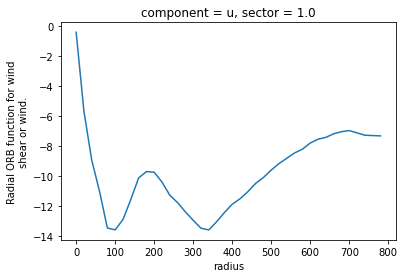

In [11]:
import matplotlib.pyplot as plt
rp[0,0].plot()

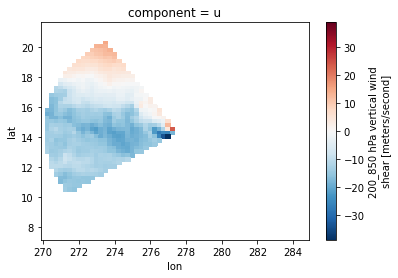

In [12]:
import numpy as np
dataset.where(np.isin(dataset.sector, [1]))[1].plot()

In [18]:
import kernels as k
x = dataset
stride = 20
h = 50
kernel = k.epanechnikov

In [ ]:
lat = x.lat.values
lon = x.lon.values

    # Create lat/lon grids out of the arrays, so we have every individual 
    # (lon, lat) coordinate combination
lat_grid, lon_grid = [x.T for x in np.meshgrid(lat, lon)]

    # Get the center of the stamp from the DataArray
center_lat = x.attrs["center_lat"]
center_lon = x.attrs["center_lon"]

dist_mat = great_circ_dist(center_lat, center_lon, lat_grid, lon_grid)

radii = np.arange(start = 0, stop = x.attrs["stamp_radius"], step = stride)

sectors = x.sector.values
sectors_unique = np.sort(np.unique(sectors))
    
u_comp = np.ma.masked_invalid(x.sel(component = "u").values)
v_comp = np.ma.masked_invalid(x.sel(component = "v").values)
stamp_mask = u_comp.mask

profiles = np.zeros((2, sectors_unique.size, radii.size))

In [ ]:
ii = 15
dist_kerneled = np.ma.array(kernel(dist_mat - radii[ii], h))
u_weighted = np.multiply(dist_kerneled, u_comp)
v_weighted = np.multiply(dist_kerneled, v_comp)

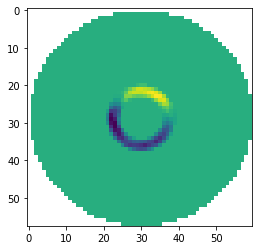

In [34]:
import matplotlib.pyplot as plt
plt.imshow(np.where(u_weighted.mask, np.nan, u_weighted))
plt.show()

In [59]:
jj = 3
sector_mask = np.logical_or(stamp_mask, sectors != sectors_unique[jj], np.array(dist_kerneled) == 0.)
u_weighted.mask = sector_mask
v_weighted.mask = sector_mask
dist_kerneled.mask = sector_mask

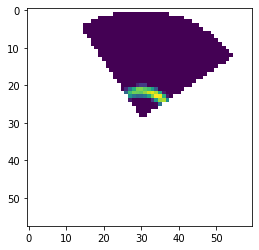

In [60]:
plt.imshow(u_weighted)
plt.show()

In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("hurdat", "../ORB/python/convective-structure/hurdat.py")
h = importlib.util.module_from_spec(spec)
spec.loader.exec_module(h)

hdata = h.Hurdat()

a = hdata.genesis_to_lysis_filter(50)